# Brain Stroke prediction documented by Trevor Machimbidza

A stroke happens when the blood supply to part of the brain is cut off, killing brain cells. Damage to the brain can affect how the body works. It can also change how you think and feel. The effects of a stroke depend on where it takes place in the brain, and how big the damaged area is.

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r'C:\Users\Admin\Documents\PROJECTS\ML Projects\Brainstroke detection\Stroke-Risk-Prediction-using-Machine-Learning-master\Stroke-Risk-Prediction-using-Machine-Learning-master\dataset\healthcare-dataset-stroke-data.csv')

In [5]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data statistics

In [8]:
data.shape

(5110, 12)

In [9]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [13]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Exploratory Data Analysis

In [6]:
#bmi shows that there are null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#checking the actual number of null values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# filling the null values

In [16]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [17]:
data['bmi'].describe

<bound method NDFrame.describe of 0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64>

In [18]:
 data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [19]:
#If you are dropping values its dropna
#Filling the Nan values with the mean of the bmi
data['bmi'].fillna(data['bmi'].mean()) 

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [21]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [26]:
#filling the null values with the mean
data['bmi'].fillna(data['bmi'].mean(), inplace=True) 

In [28]:
#Missing values handled there nolonger is any null values as shown below
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [29]:
#dropping the id column
data.drop('id',axis=1, inplace=True)

In [30]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Outlier removation

<Axes: >

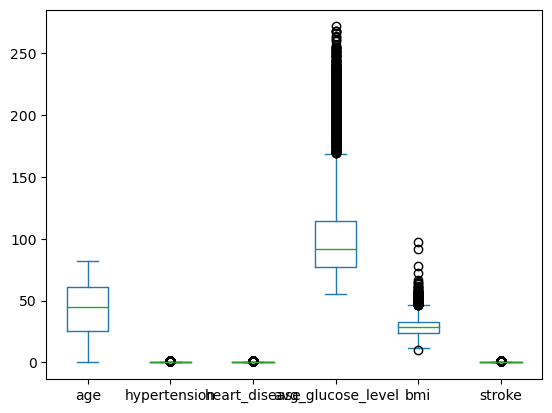

In [31]:
#Box plot making
data.plot(kind='box')

In [33]:
  data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [35]:
data[data['avg_glucose_level']>114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [34]:
data['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

# Label Encoding

In [36]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [42]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [44]:
gender=enc.fit_transform(data['gender'])

In [45]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [46]:
smoking_status

array([1, 2, 2, ..., 2, 1, 0])

In [47]:
list(smoking_status)

[1,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 3,
 3,
 0,
 2,
 2,
 3,
 3,
 2,
 0,
 3,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 3,
 1,
 3,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 3,
 1,
 3,
 2,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 3,
 3,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 3,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 3,
 1,
 3,
 2,
 2,
 1,
 3,
 1,
 2,
 0,
 2,
 3,
 3,
 1,
 2,
 1,
 0,
 3,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 3,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 3,
 2,
 2,
 3,
 3,
 1,
 2,
 1,
 3,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 3,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 3,
 0,
 3,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 0,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,


In [49]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [50]:
work_type

array([2, 3, 2, ..., 3, 2, 0])

In [52]:
Residence_type

array([1, 0, 0, ..., 0, 0, 1])

In [53]:
ever_married

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
gender

array([1, 0, 1, ..., 0, 1, 0])

In [59]:
smoking_status

array([1, 2, 2, ..., 2, 1, 0])

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(1), int64(3), object(4)
memory usage: 419.3+ KB


In [61]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,2,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,3,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,2,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,2,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,3,Rural,174.12,24.000000,never smoked,1


In [62]:
data['work_type'].unique()

array([2, 3, 0, 4, 1])

In [63]:
data['work_type']=work_type

In [66]:
data['gender']=gender

In [69]:
data['ever_married']=ever_married

In [70]:
data['Residence_type']=Residence_type

In [72]:
data['smoking_status']=smoking_status

In [73]:
#The whole table are now numbers below
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [74]:
#Dtype now in numerical format either float or int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Partitioning


This is basically splitting the data into train and test

data splitting for train aqnd test

X---train_X,test_X  80/20
Y---train_Y,test_Y

In [76]:
X=data.drop('stroke', axis=1)

In [77]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [80]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [78]:
Y=data['stroke']

In [79]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [81]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=101)

In [87]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [88]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [89]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [90]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

# Normalization

In [91]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [93]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [94]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [95]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [96]:
 X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [97]:
#the distance between the values has been scaled down as illustrated below
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [98]:
X_test_std

array([[-0.83822764, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83822764,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83822764,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83822764,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83822764,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19059095,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

# Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [104]:
dt.fit(X_train_std, Y_train)

DecisionTreeClassifier()

In [105]:
dt.feature_importances_

array([0.03710864, 0.18063602, 0.01904572, 0.02550664, 0.01025572,
       0.04222555, 0.04758382, 0.34506455, 0.24047508, 0.05209826])

In [110]:
# 'age=0.18063602' , 'bmi', and avg_glucose_level are the most important features.
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [115]:
Y_pred=dt.predict(X_test_std)

In [116]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [117]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [112]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(Y_test, Y_pred)

0.9099804305283757

In [119]:
ac_dt=accuracy_score(Y_test, Y_pred)

In [120]:
ac_dt

0.9099804305283757

# Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [124]:
lr.fit(X_train_std, Y_train)

LogisticRegression()

In [177]:
Y_pred_lr=lr.predict(X_test_std)

In [131]:
lr.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [126]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [132]:
accuracy_score(Y_test, Y_pred)

0.9471624266144814

In [133]:
ac_lr=accuracy_score(Y_test, Y_pred)

In [134]:
ac_lr

0.9471624266144814

# KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [138]:
knn.fit(X_train_std, Y_train)

KNeighborsClassifier()

In [139]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [140]:
knn.predict(X_test_std)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [141]:
Y_pred=knn.predict(X_test_std)

In [143]:
accuracy_score(Y_test, Y_pred)

0.9452054794520548

In [145]:
ac_knn=accuracy_score(Y_test, Y_pred)

In [146]:
ac_knn

0.9452054794520548

# Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [152]:
rf.fit(X_train_std, Y_train)

RandomForestClassifier()

In [154]:
Y_pred=rf.predict(X_test_std)

In [155]:
ac_rf=accuracy_score(Y_test, Y_pred)

In [156]:
#Comparison of the accuracy scores below
ac_rf

0.9452054794520548

In [157]:
ac_knn

0.9452054794520548

In [158]:
  ac_lr

0.9471624266144814

In [159]:
ac_dt

0.9099804305283757

# Support Vector Machines

In [162]:
from sklearn.svm import SVC

In [163]:
sv=SVC()

In [164]:
sv.fit(X_train_std, Y_train)

SVC()

In [168]:
Y_pred=sv.predict(X_test_std)

In [169]:
ac_sv=accuracy_score(Y_test, Y_pred)

In [170]:
ac_sv

0.9471624266144814

In [165]:
sv.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [166]:
accuracy_score(Y_test, Y_pred)

0.9452054794520548

In [167]:
ac_lr

0.9471624266144814

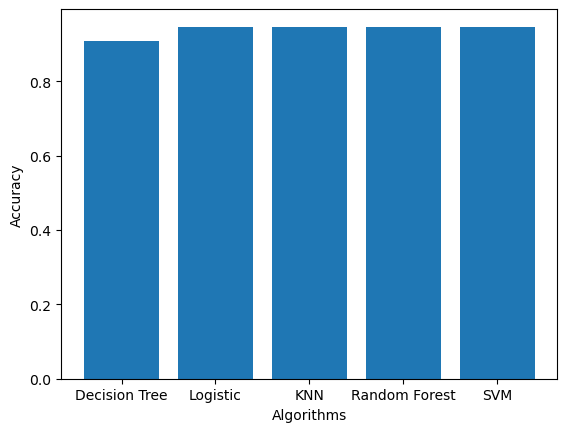

In [176]:
plt.bar(['Decision Tree','Logistic','KNN', 'Random Forest', 'SVM'],[ac_dt, ac_lr, ac_knn, ac_rf, ac_sv])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()

In [179]:
import pickle
model = open(r"C:\Users\Admin\Documents\PROJECTS\ML Projects\Brainstroke detection\Stroke-Risk-Prediction-using-Machine-Learning-master\Stroke-Risk-Prediction-using-Machine-Learning-master\logistic.sav","wb")
pickle.dump(Y_pred_lr,model)